<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
#Keras provides the img_to_array() function for converting a loaded image in PIL format
#into a NumPy array for use with deep learning models
from tensorflow.keras.preprocessing.image import img_to_array
#array_to_img() function that can be used for converting a NumPy array of pixel data into a PIL
#Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical
#To arrange the Keras layers in a sequential order
from tensorflow.keras.models import Sequential
#Flatten layer is used to make the multidimensional input one-dimensional,
#commonly used in the transition from the convolution layer to the full connected layer.
#defines the size of the output from the dense layer
from tensorflow.keras.layers import Flatten, Dense
from keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/gender_dataset_face.zip'

Archive:  /content/drive/MyDrive/gender_dataset_face.zip
  inflating: gender_dataset_face/woman/face_180.jpg  
  inflating: gender_dataset_face/woman/face_648.jpg  
  inflating: gender_dataset_face/woman/face_133.jpg  
  inflating: gender_dataset_face/woman/face_296.jpg  
  inflating: gender_dataset_face/woman/face_647.jpg  
  inflating: gender_dataset_face/woman/face_327.jpg  
  inflating: gender_dataset_face/woman/face_1047.jpg  
  inflating: gender_dataset_face/woman/face_171.jpg  
  inflating: gender_dataset_face/woman/face_635.jpg  
  inflating: gender_dataset_face/woman/face_1082.jpg  
  inflating: gender_dataset_face/woman/face_1274.jpg  
  inflating: gender_dataset_face/woman/face_1233.jpg  
  inflating: gender_dataset_face/woman/face_1211.jpg  
  inflating: gender_dataset_face/woman/face_896.jpg  
  inflating: gender_dataset_face/woman/face_855.jpg  
  inflating: gender_dataset_face/woman/face_288.jpg  
  inflating: gender_dataset_face/woman/face_1269.jpg  
  inflating: gender

# save all images into image_files var

In [4]:
image_files = [f for f in glob.glob(r'/content/gender_dataset_face/**/*.jpg', recursive=True) if not os.path.isdir(f)]
image_files

['/content/gender_dataset_face/woman/face_1173.jpg',
 '/content/gender_dataset_face/woman/face_1047.jpg',
 '/content/gender_dataset_face/woman/face_1071.jpg',
 '/content/gender_dataset_face/woman/face_781.jpg',
 '/content/gender_dataset_face/woman/face_769.jpg',
 '/content/gender_dataset_face/woman/face_1235.jpg',
 '/content/gender_dataset_face/woman/face_1368.jpg',
 '/content/gender_dataset_face/woman/face_359.jpg',
 '/content/gender_dataset_face/woman/face_133.jpg',
 '/content/gender_dataset_face/woman/face_846.jpg',
 '/content/gender_dataset_face/woman/face_263.jpg',
 '/content/gender_dataset_face/woman/face_606.jpg',
 '/content/gender_dataset_face/woman/face_134.jpg',
 '/content/gender_dataset_face/woman/face_1359.jpg',
 '/content/gender_dataset_face/woman/face_1314.jpg',
 '/content/gender_dataset_face/woman/face_1036.jpg',
 '/content/gender_dataset_face/woman/face_1080.jpg',
 '/content/gender_dataset_face/woman/face_213.jpg',
 '/content/gender_dataset_face/woman/face_525.jpg',
 '/

The code snippet you provided is a Python code that does the following:

1. **Imports Required Libraries**: It assumes that you have `glob` and `os` libraries already imported. `glob` is used for pathname searching, and `os` is used for interacting with the operating system.

2. **Search for Image Files**:
   - `glob.glob(r'/content/gender_dataset_face/**/*.jpg', recursive=True)` searches for all files with the `.jpg` extension within the directory `/content/gender_dataset_face/` and its subdirectories (due to `**`).
   - The `recursive=True` argument indicates that it should include files from all levels of subdirectories.

3. **Filter Out Directories**:
   - The code then filters this list to exclude any directories. The condition `if not os.path.isdir(f)` checks if the found item is not a directory.

4. **Create a List of Image File Paths**:
   - The result is stored in the list `image_files`, which contains the paths of all `.jpg` files found in the specified directory and its subdirectories, excluding any directories.

5. **Return the List**: Finally, displaying `image_files` provides the list of image file paths.

In summary, this code finds and lists all JPEG image files in a specified folder and its subfolders, while ignoring any directories.


In [5]:
image_files[-1]

'/content/gender_dataset_face/man/face_93.jpg'

In [6]:
random.shuffle(image_files)

In [7]:
image_dimension = (100, 100, 3)

# creating an empty list

In [8]:
data = []
labels = []

In [9]:
img = '/content/gender_dataset_face/woman/face_0.jpg'

In [10]:
label = img.split(os.path.sep)
print(label[-2])

woman


In [11]:
print(label[-2])

woman


In [12]:
for img in image_files:
    image = cv2.imread(img)
    image = cv2.resize(image, (image_dimension[0], image_dimension[1]))
    image = img_to_array(image)
    data.append(image)
    label = img.split(os.path.sep)[-2]
    if label=="woman":
        label=1
    else:
        label=0
    labels.append([label])

In [13]:
print(labels)

[[1], [1], [1], [0], [1], [1], [0], [0], [1], [1], [1], [0], [1], [0], [1], [1], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [0], [1], [1], [0], [1], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [1], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [1], [1], [1], [1], [0], [0], [0], [1], [1], [0], [0], [0], [1], [1], [0], [0], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [1], [1], [0], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [1], [1], [0], [0], [1], [1], [1], [0], [0], [0], [0], [1], [0], [0], [1], [1], [1], [1], [0], [0], [0], [1], [1], [0], [1], [1], [1], [1], [0], [1], [0], [1], [1], [1], [0], [1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [1], [1], [1], [0], [1], [1], [1], [1], [0], [0], [0], [0],

# Now we will convert this into a Numpy Array

In [14]:
data = np.array(data, dtype = 'float')

In [15]:
labels = np.array(labels)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train[:1])

[[[[  0.  23.  50.]
   [  0.  24.  51.]
   [  1.  26.  53.]
   ...
   [198. 219. 234.]
   [206. 221. 231.]
   [211. 222. 230.]]

  [[ 17.  48.  80.]
   [ 19.  50.  81.]
   [ 21.  51.  82.]
   ...
   [197. 217. 232.]
   [204. 219. 230.]
   [209. 220. 228.]]

  [[ 23.  64. 105.]
   [ 25.  66. 105.]
   [ 26.  65. 104.]
   ...
   [199. 219. 235.]
   [206. 220. 231.]
   [209. 220. 228.]]

  ...

  [[ 34. 112. 179.]
   [ 31. 105. 175.]
   [ 29.  98. 170.]
   ...
   [187. 199. 204.]
   [177. 190. 196.]
   [168. 182. 188.]]

  [[ 26. 100. 172.]
   [ 29. 101. 173.]
   [ 32. 101. 174.]
   ...
   [186. 198. 202.]
   [178. 191. 196.]
   [172. 186. 192.]]

  [[ 33. 110. 179.]
   [ 37. 111. 182.]
   [ 41. 112. 185.]
   ...
   [186. 199. 204.]
   [176. 191. 198.]
   [170. 186. 193.]]]]


In [17]:
print(y_train[1])

[1]


In [18]:
print(y_train[-1])

[1]


# Expanding the dimensions

In [19]:
trainy = to_categorical(y_train, num_classes = 2)
testy = to_categorical(y_test, num_classes=2)

In [20]:
trainy[1]

array([0., 1.])

In [21]:
trainy[-1]

array([0., 1.])

In [22]:
augmentation_data = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # Specifies the strategy to fill in newly created pixels.
)

In [23]:
Vgg16 = VGG16(input_shape=(100,100,3), weights='imagenet', include_top=False) # Defining the VGG16 model

for layers in Vgg16.layers: # Iterating over layers in Vgg16 (note the capital 'V')
    layers.trainable = False # Setting each layer to non-trainable

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [24]:
x = Flatten()(Vgg16.output) # Changed 'vgg16' to 'Vgg16'
folders = glob.glob(r'/content/gender_dataset_face/*')
len(folders)

2

In [25]:
prediction = Dense (len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=Vgg16.input, outputs=prediction)

In [26]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │           9,218 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,723,906 (56.17 MB)

 Trainable params: 9,218 (36.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [28]:
batch_size = 32

In [35]:
history = model.fit(
    augmentation_data.flow(X_train, trainy, batch_size=batch_size),
    validation_data=(X_test, testy),
    epochs=100
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - accuracy: 0.9333 - loss: 0.4838 - val_accuracy: 0.9567 - val_loss: 0.5525
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.9473 - loss: 0.4193 - val_accuracy: 0.9524 - val_loss: 0.6100
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 124ms/step - accuracy: 0.9391 - loss: 0.5257 - val_accuracy: 0.9481 - val_loss: 0.5756
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.9402 - loss: 0.4069 - val_accuracy: 0.9199 - val_loss: 1.1101
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.9396 - loss: 0.4733 - val_accuracy: 0.9459 - val_loss: 0.7358
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9309 - loss: 0.5749 - val_accuracy: 0.9199 - val_loss: 0.8017
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.9330 - loss: 0.4966 - val_accuracy: 0.9437 - val_loss: 0.6333
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.9361 - loss: 0.4586 - val_accuracy: 0.9524

In [37]:
model.save("Gender_Classification_with_VGG16.h5")

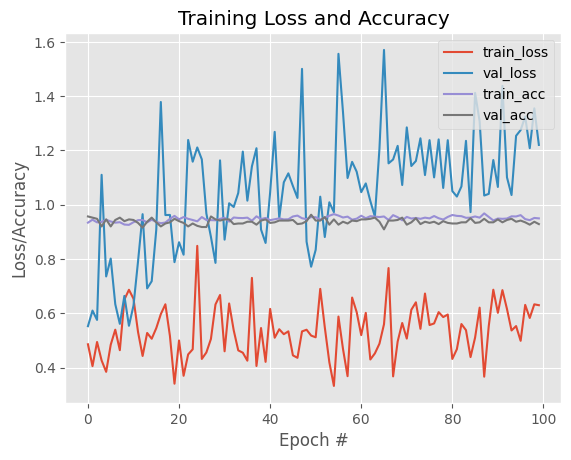

In [38]:
plt.style.use("ggplot")

plt.figure()

N = len(history.history["loss"]) # Changed to get the actual number of epochs from the history object.

plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('gender_classification_with_Vgg16.png')

In [43]:
image = cv2.imread('/content/SingleFace.jpg')
face_crop = cv2.resize(image, (100,100))
face_crop.shape

(100, 100, 3)

In [44]:
face_crop = face_crop.astype("float") / 255.0
face_crop = img_to_array(face_crop)
face_crop = np.expand_dims(face_crop, axis=0)

In [45]:
conf = model.predict(face_crop)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [46]:
classes = ['man', 'woman']

In [47]:
idx = np.argmax(conf)

In [48]:
label = classes[idx]

In [49]:
print(label)

man
